# Topic Modeling Analysis Notebook
# <font color='red'> *NOTE: Make sure to update the trt_API files!* </font>

#### This notebook contains a demonstration of the tools necessary for conducting clustering on Twitter data. 

In [1]:
import trt_API.process as proc
import trt_API.analysis as ana
import trt_API.clustering as cluster
import trt_API.org_research as org 

import datetime
from sklearn.feature_extraction import text 

SORTED = False

[nltk_data] Downloading package wordnet to /Users/rajuy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## PREPROCESSING

### Variables for Analysis

In [2]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = True

### Load Tweet and Generate Dataframe

In [3]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
encoding = True #Use False on Macs for better results
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH, encoding)

Loaded utf-8 df.
Initial size: 0
Dropping duplicates...
Final size: 0


### Extract Potential Cashtags

In [4]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 0


### Removing Noisy Tweets

In [5]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)
cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']
cldf['tweet'] = cldf['original_tweet']
del cldf['original_tweet']

Removed 0 noisy terms.


### Remove Retweets

In [6]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)

IndexError: single positional indexer is out-of-bounds

In [ ]:
print(cldf_no_RT.shape[0])

13056


## SPLITTING DATA

### By date

In [ ]:
cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)
begin = datetime.datetime(2016,10,2,23,59) #year, month, day, hour, minute
end = datetime.datetime(2019,1,2,23,59)
specific_range_cldf = cldf[cldf.date > begin]
specific_range_cldf = specific_range_cldf[specific_range_cldf.date < end]

### By terms

In [ ]:
terms_of_interest = ["weather"]
bsdf = proc.findTerms(cldf, terms_of_interest)

Found 253 terms of interest.


/Users/rajuy/Downloads/twitter_research_tools-master/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


## CLUSTERING

In [ ]:
'''
*** Enter additional stop words here.
*** This will ignore the words rather than removing tweets as with noisy Tweets.
'''
ADDITIONAL_STOP_WORDS = ['rt','wa','http','ha','1','ð','3','weâ','â','foâ','amp',\
                        '10','iâ','ieâ','5','2','ï','¾','¾â','itâ']
stop_words = text.ENGLISH_STOP_WORDS.union(org.STOP_WORDS)
stop_words = stop_words.union(ADDITIONAL_STOP_WORDS)

In [ ]:
'''
*** Clustering requires the use of a number of parameters for tuning.
*** These are included below and should be set based on your project.
'''
n_FEATURES = 300
n_TOPICS = 10
n_TOP_WORDS = 10
n_TOP_TWEETS = 10
NGRAM = 3

In [ ]:
cvectors, cvector_feature_names = cluster.countVectorizer(cldf, n_FEATURES, \
                                           NGRAM, stop_words)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['change', 'doe', 'greeting', 'le', 'regard'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
lda, lda_embedding = cluster.LDA(cvectors, n_TOPICS)

In [ ]:
cluster.printLDA(cldf, lda, lda_embedding, cvector_feature_names,\
                   n_TOP_WORDS, n_TOPICS, n_TOP_TWEETS)

Topic 1:
earthday
 happy
 happy earthday
 water
 save
 environmental
 clean
 planet
 green
 pollution

1) Happy #EarthDay! Did you know that each propane industrial forklift replaced with one powered by a #hydrogen #fuelcell can reduce carbon emissions by up to 85% per year? Learn more at https://t.co/Icmyo5Bif1 https://t.co/69bGdhcLGy

2) When #EarthDay was first created 48 years ago, there was no Environmental Protection Agency, no Clean Air Act, or Clean Water Act https://t.co/yh8Iau438Z

3) When #EarthDay was first created 48 years ago, there was no Environmental Protection Agency, no Clean Air Act, or Clean Water Act https://t.co/yh8Iau438Z

4) When #EarthDay was first created 48 years ago, there was no Environmental Protection Agency, no Clean Air Act, or Clean Water Act https://t.co/yh8Iau438Z

5) When #EarthDay was first created 48 years ago, there was no Environmental Protection Agency, no Clean Air Act, or Clean Water Act https://t.co/yh8Iau438Z

6) When #EarthDay was first c

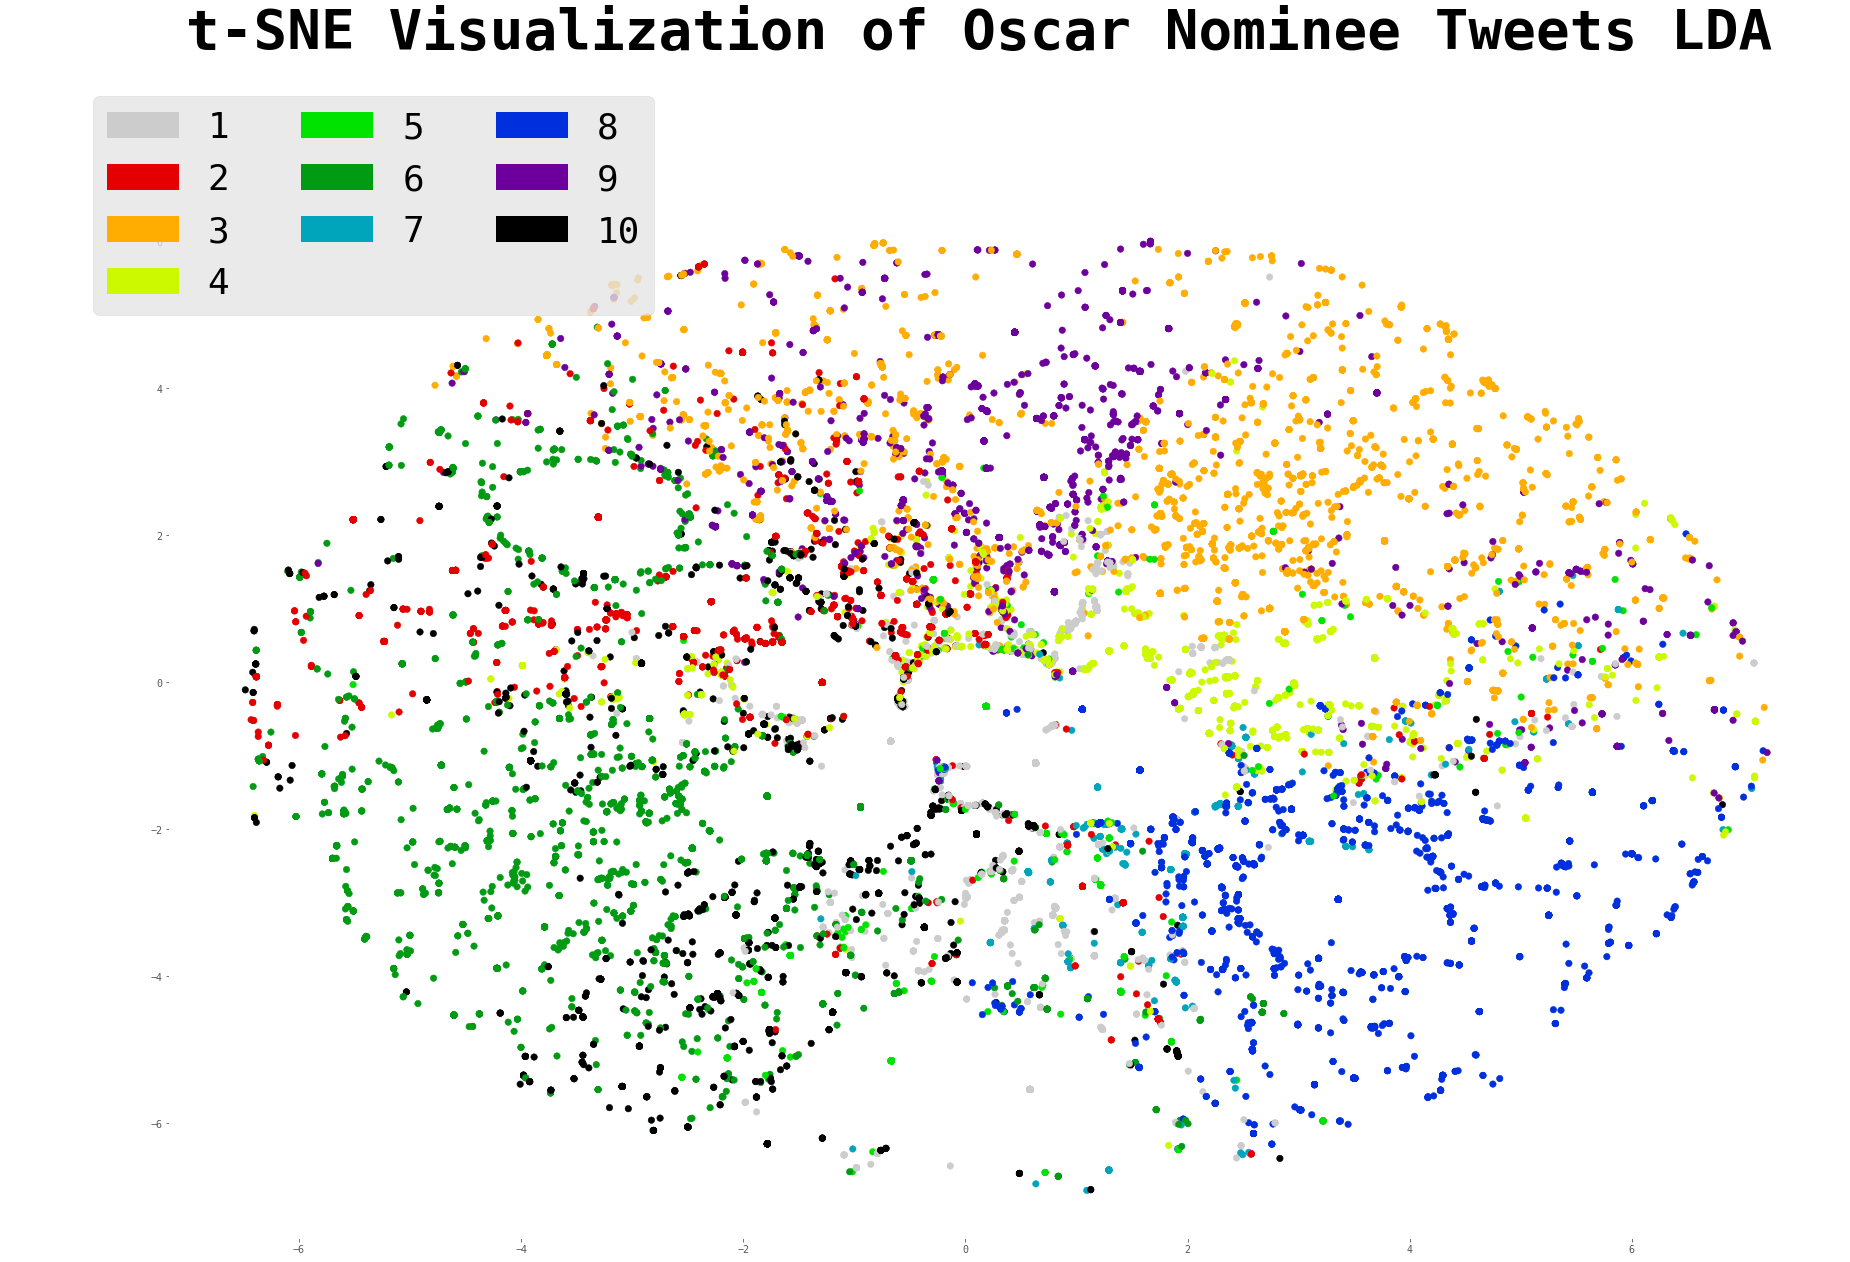

In [ ]:
PERPLEXITY = 2.0
cluster.tSNE(lda_embedding, PERPLEXITY, n_TOPICS, title = \
             't-SNE Visualization of Oscar Nominee Tweets LDA')